### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");
conc_l = append!([0.00000000001], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/eh/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [6]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [150.0, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 38.941, 9.94827, 0.00294624, 0.0422821, 0.02, 0.008]
# max num of steps
num_steps=4000

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)

Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
50.12 secs, 330 evals, 247 steps, improv/step: 0.433 (last = 0.4332), fitness=40072.445224755
100.17 secs, 664 evals, 565 steps, improv/step: 0.396 (last = 0.3679), fitness=24950.421272044
150.26 secs, 998 evals, 899 steps, improv/step: 0.360 (last = 0.2994), fitness=18102.085153321
200.38 secs, 1332 evals, 1233 steps, improv/step: 0.337 (last = 0.2725), fitness=11867.074213958
250.47 secs, 1666 evals, 1567 steps, improv/step: 0.315 (last = 0.2335), fitness=11867.074213958
300.53 secs, 2000 evals, 1901 steps, improv/step: 0.304 (last = 0.2545), fitness=10479.891745806
350.61 secs, 2335 evals, 2236 steps, improv/step: 0.286 (last = 0.1821), fitness=10401.066979842
400.71 secs, 2670 evals, 2572 steps, improv/step: 0.273 (last = 0.1875), fitness=10366.259630607
450.79 secs, 3005 evals, 2907 

(9641.009351175291, [54.062587476919944, 1.1840486703488842, 0.00622026530987197, 0.05683443846808926, 0.04310397280234652, 0.025590033404952334, 36.65683200254862, 34.68203010195391, 10.040492833643977, 5.1978574753984, 0.008887142527671423, 0.0012061076827457704])

In [7]:
pars=getDDEparams(params, conc_l)

6×8 Array{Float64,2}:
  0.0568344     0.0539842     0.0507912    …   0.0133193    0.0096109 
  0.02559       0.0265763     0.0276812        0.0406475    0.0419307 
 34.682        34.7932       34.9178          36.3799      36.5245    
  5.19786       5.47056       5.77606          9.36128      9.71609   
  7.45405e-18   0.000500461   0.0010611        0.00764066   0.00829179
  1.01162e-18   6.79195e-5    0.000144006  …   0.00103694   0.00112531

### Plot the data with the new set of parameters for DDE

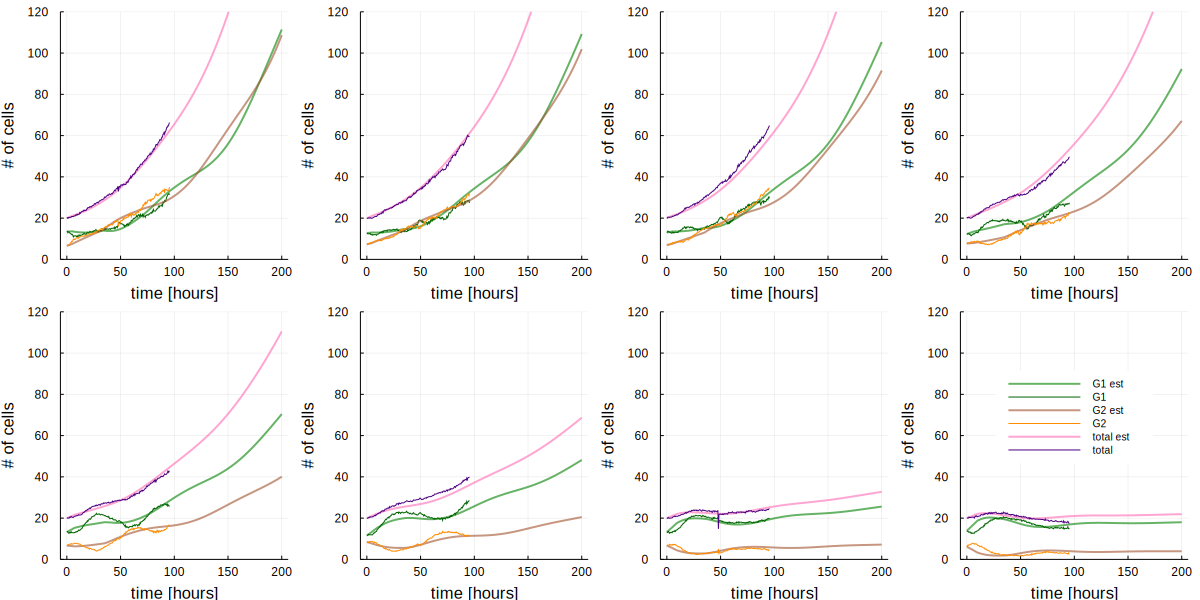

In [8]:
plot_all(pars, popl, g2l, g1l, g2_0l, g1_0l)

### Plot Hill curve for all of the DDE model parameters

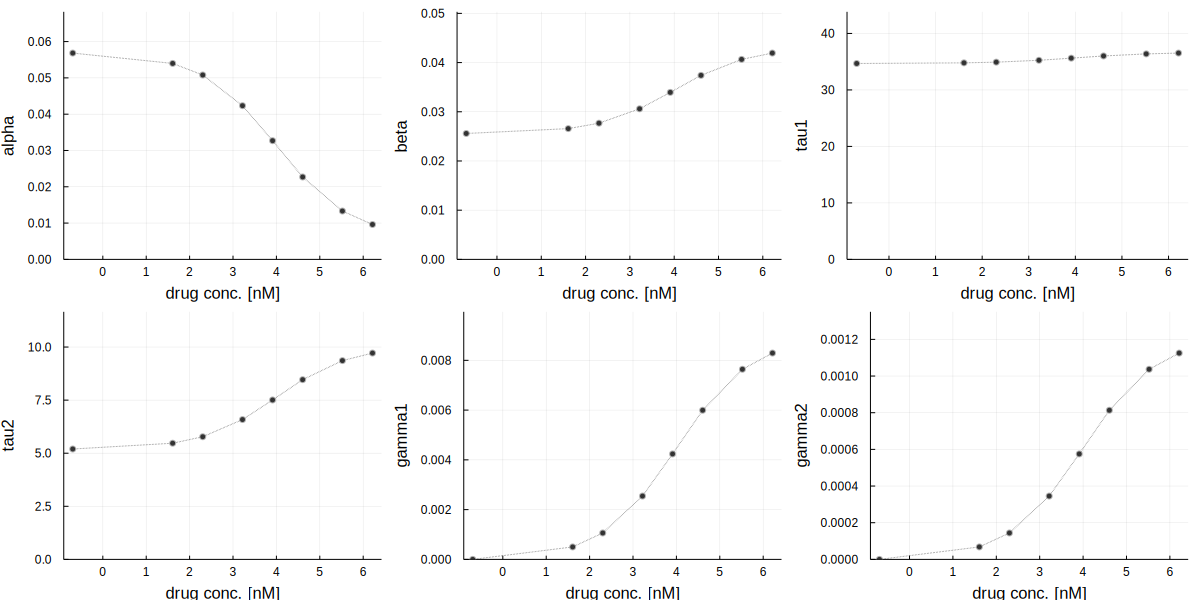

In [9]:
plot_parameters(conc_l, pars)